# Backpropagation and Multilayer Neural Networks
- **Antoine ISNARDY**
- **Benjamin MULLER**
### Goals: 
- Diving deep: implement a real gradient descent in `Numpy`
- Auto-differentiation: the basics of `TensorFlow`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

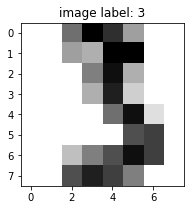

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

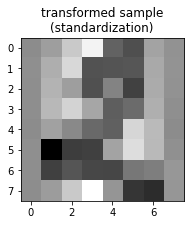

In [4]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

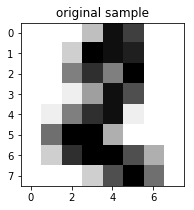

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [7]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [8]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

Using TensorFlow backend.


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [9]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.8326 - acc: 0.7950     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2775 - acc: 0.9476     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1891 - acc: 0.9614     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1473 - acc: 0.9712     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1224 - acc: 0.9797     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.1047 - acc: 0.9817     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0911 - acc: 0.9862     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0815 - acc: 0.9889     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0728 - acc: 0.9895     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0662 - acc: 0.9908     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is avaiable at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [10]:
def basic_model():
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation("tanh"))
    model.add(Dense(K))
    model.add(Activation("softmax"))
    return model

In [11]:
model = basic_model()
model.compile(optimizer=optimizers.SGD(lr=.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.9757 - acc: 0.3379     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.2717 - acc: 0.6870     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.9371 - acc: 0.7845     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.7528 - acc: 0.8271     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.6344 - acc: 0.8612     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.5508 - acc: 0.8802     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.4881 - acc: 0.9011     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.4394 - acc: 0.9129     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.4005 - acc: 0.9214     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.3687 - acc: 0.9299     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

In [12]:
model = basic_model()
model.compile(optimizer=optimizers.SGD(lr=.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 2.6582 - acc: 0.0439     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 2.5175 - acc: 0.0629     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 2.3861 - acc: 0.0995     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 2.2635 - acc: 0.1408     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 2.1494 - acc: 0.1978     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 2.0434 - acc: 0.2705     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 1.9450 - acc: 0.3491     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 1.8538 - acc: 0.4178     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 1.7692 - acc: 0.4676     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 1.6910 - acc: 0.5141     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 1

- Slower as $\eta$ decreases. Not surprising, since if $\eta$ is too slow, convergence is slow as well

In [13]:
# Very large value of eta
model = basic_model()
model.compile(optimizer=optimizers.SGD(lr=100),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 11.3123 - acc: 0.2770     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 9.9933 - acc: 0.3772      
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 9.5781 - acc: 0.4034     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 9.8308 - acc: 0.3857     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 9.0595 - acc: 0.4375     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 9.2389 - acc: 0.4257     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 9.2023 - acc: 0.4270     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 9.0234 - acc: 0.4401     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 9.1158 - acc: 0.4322     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 9.3027 - acc: 0.4224     
Epoch 11/15
1527/1527 [==============================] - 0s - loss:

In [14]:
# Nesterov momentum
model = basic_model()
model.compile(optimizer=optimizers.SGD(lr=.1, momentum=.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.4121 - acc: 0.8736     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.0837 - acc: 0.9745     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.0383 - acc: 0.9915     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0185 - acc: 0.9961     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0119 - acc: 0.9993     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0071 - acc: 1.0000     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0056 - acc: 1.0000     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0046 - acc: 1.0000     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0039 - acc: 1.0000     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0034 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

In [15]:
# %load solutions/keras_sgd_and_momentum.py
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)


# Analysis:
#
# Setting the learning rate value to a small value (e.g. lr=0.001 on
# this dataset) makes the model train much slower (it has not
# converged yet after 15 epochs).
#
# Using momentum tends to mitigate the small learning rate / slow
# training problem a bit.
#
# Setting the learning rate to a very large value (e.g. lr=10)
# makes the model randomly bounce around a good local
# minimum and therefore prevent it to reach a low training loss even
# after 30 epochs.

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.4194 - acc: 0.8651     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.0711 - acc: 0.9810     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.0289 - acc: 0.9954     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0151 - acc: 0.9987     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0106 - acc: 0.9987     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0072 - acc: 1.0000     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0058 - acc: 1.0000     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0048 - acc: 1.0000     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0042 - acc: 1.0000     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0037 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [16]:
# Adam optimizer
model = basic_model()
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.3425 - acc: 0.6326     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.5148 - acc: 0.9070     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.3207 - acc: 0.9456     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.2361 - acc: 0.9633     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1872 - acc: 0.9679     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.1544 - acc: 0.9751     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.1313 - acc: 0.9790     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.1136 - acc: 0.9817     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0992 - acc: 0.9830     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0879 - acc: 0.9856     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

- Better than SGD with default parameters. Not as good as Nesterov though with default parameters.

In [17]:
# Additional hidden layer
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.4435 - acc: 0.6280     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3580 - acc: 0.9214     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1612 - acc: 0.9699     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0981 - acc: 0.9862     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0653 - acc: 0.9902     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0460 - acc: 0.9948     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0330 - acc: 0.9961     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0244 - acc: 0.9987     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0194 - acc: 0.9993     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0145 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

- Still possible to run with default parameters

In [18]:
# Adadelta
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adadelta", loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.8923 - acc: 0.4355     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.0066 - acc: 0.8284     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.5572 - acc: 0.8959     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.3614 - acc: 0.9293     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.2627 - acc: 0.9437     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.2031 - acc: 0.9594     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.1654 - acc: 0.9659     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.1371 - acc: 0.9731     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.1159 - acc: 0.9790     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0996 - acc: 0.9817     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

In [19]:
# %load solutions/keras_adam_and_adadelta.py
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

# Analysis:
#
# Adam with its default global learning rate of 0.001 tends to work
# in many settings often converge as fast or faster than SGD
# with a well tuned learning rate.
#
# Adadelta has no learning rate setting at all
#
# References:
#
# Adadelta: https://arxiv.org/abs/1212.5701
# Adam:     https://arxiv.org/abs/1412.6980

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.3890 - acc: 0.6320     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.4005 - acc: 0.9044     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1830 - acc: 0.9587     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1094 - acc: 0.9751     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0703 - acc: 0.9895     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0502 - acc: 0.9941     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0365 - acc: 0.9974     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0269 - acc: 0.9987     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0201 - acc: 0.9987     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0158 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [20]:
# Nesterov momentum
model = basic_model()
model.compile(optimizer=optimizers.SGD(lr=.1, momentum=.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.3905 - acc: 0.8841     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.0693 - acc: 0.9797     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.0336 - acc: 0.9928     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0166 - acc: 0.9987     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0098 - acc: 0.9993     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0068 - acc: 1.0000     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0059 - acc: 1.0000     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0048 - acc: 1.0000     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0042 - acc: 1.0000     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0037 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

In [21]:
Y_pred = model.predict_classes(X_test, verbose=0)

In [22]:
Y_pred

array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 8, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1, 9,
       8, 0, 9, 8, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1, 6, 5,
       0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2, 6, 8, 6,
       8, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 7, 6, 0, 6, 0,
       8, 3, 6, 7, 3, 0, 7, 4, 8, 5, 8, 1, 4, 1, 2, 9, 1, 4, 8, 9, 9, 0, 9,
       5, 6, 8, 2, 1, 4, 3, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2, 5, 6, 9, 1, 2, 7,
       6, 0, 9, 2, 1, 6, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3, 3, 4, 8, 2, 2, 5, 6,
       0, 7, 9, 6, 8, 6, 1, 1, 3, 9, 2, 0, 9, 0, 2, 2, 8, 0, 7, 6, 0, 8, 5,
       3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7, 4, 0, 8, 1, 4, 0, 8, 8, 6,
       5, 0, 1, 6, 2, 0, 4, 7, 5, 3, 7, 3, 4, 5, 9, 9, 7, 3, 4, 5, 8, 1, 1,
       9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3, 6, 0, 8, 6, 7, 6, 7, 9, 2, 6, 8,
       3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5, 2, 8, 8, 8, 9, 0])

In [23]:
print("Accuracy: %0.5f"%np.mean(Y_pred==y_test))

Accuracy: 0.97778


test acc: 0.9778


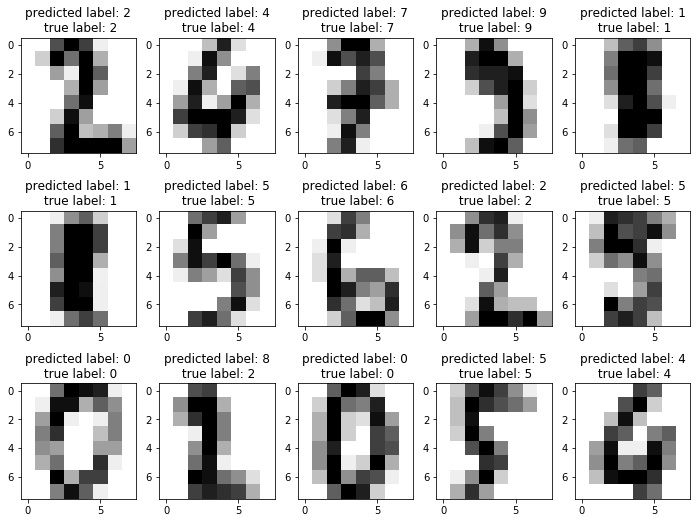

In [24]:
# %load solutions/keras_accuracy_on_test_set.py
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.

In [25]:
# id idx
idx = 42

In [26]:
# Conditional proba for test sample 
y_pred_proba = model.predict_proba(X_test, verbose=0)

In [27]:
print('Conditional probabilities of sample nb %d'%idx)
np.around(y_pred_proba[42], 5)

Conditional probabilities of sample nb 42


array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   9.99989986e-01,
         9.99999975e-06], dtype=float32)

In [28]:
print('Negative log-likelihood of sample nb %d'%idx)
y_pred_proba[idx, y_test[idx]] # relevant with above

Negative log-likelihood of sample nb 42


0.99998856

In [29]:
Y_test = to_categorical(y_test)
ll = np.sum(np.log(y_pred_proba) * Y_test, axis=1)
print('Negative log-likelihood on test set: %0.4f'%-np.mean(ll))

Negative log-likelihood on test set: 0.0780


Predicted probability distribution for sample #42:
0: 0.00000
1: 0.00000
2: 0.00000
3: 0.00000
4: 0.00000
5: 0.00000
6: 0.00000
7: 0.00000
8: 0.99999
9: 0.00001

Likelihood of true class for sample #42:
0.999989

Average negative loglikelihood of the test set:
0.0779925171688


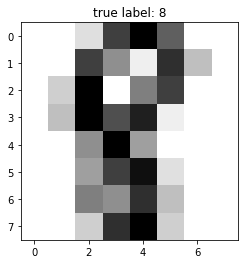

In [30]:
# %load solutions/keras_loss_on_test_set.py
sample_idx = 42
plt.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("true label: %d" % y_test[sample_idx])

# Compute all probabilities for all samples in the test set at
# once:
probabilities = model.predict_proba(X_test, verbose=0)

print("Predicted probability distribution for sample #42:")
for class_idx, prob in enumerate(probabilities[sample_idx]):
    print("%d: %0.5f" % (class_idx, prob))
print()
    
print("Likelihood of true class for sample #42:")
print(probabilities[sample_idx, y_test[sample_idx]])
print()

print("Average negative loglikelihood of the test set:")
Y_test = to_categorical(y_test)
loglikelihoods = np.sum(np.log(probabilities) * Y_test, axis=1)
print(-np.mean(loglikelihoods))

# Analysis
#
# Depending on the random init, the 2 hidden layers net trained with
# adam seem to converge to a training loss very close to zero when
# given enough epochs (the accuracy on the training set is 100%).
# This model is therefore not underfitting: it has enough capacity
# to perfectly memorise the full training set.
#
# On the test set the negative log likelihood is also close to zero
# but never as much as on the training set (~= 0.07) even after
# increasing the maximum number of epochs. The model is therefore
# overfitting as little.

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [31]:
# IMPORTANT QCM
from keras import initializations

def normal_init(shape, name=None):
    return initializations.normal(shape, scale=0.01, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 2.3033     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3028     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3021     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.2996     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.2817     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 2.0981     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 1.7846     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 1.4430     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.1352     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 0.9025     


#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [32]:
def small_init(shape, name=None):
    return initializations.normal(shape, scale=0.001, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=small_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 2.3035     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3032     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3027     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.3024     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.3013     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 2.2982     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 2.2718     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 2.0451     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.6622     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 1.2945     


In [33]:
def large_init(shape, name=None):
    return initializations.normal(shape, scale=1, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 2.3036     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3027     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3019     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.2978     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.2347     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 1.9194     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 1.7818     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 1.7215     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.5887     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 1.2633     


In [34]:
def very_large_init(shape, name=None):
    return initializations.normal(shape, scale=10, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=very_large_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 2.2217     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 1.6363     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 1.1567     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 0.8351     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 0.6251     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 0.4880     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 0.4000     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 0.3415     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 0.2994     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 0.2665     


In [35]:
model = Sequential()
model.add(Dense(H, input_dim=N, init='zero'))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 0s - loss: 2.3033     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.3027     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.3022     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 2.3013     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 2.2971     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 2.2555     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.9549     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 1.5427     


- Very small or very large init: loss is very high and struggles to decrease !
    - Small init: hard to escape low gradients
    - Large init: softmax values are either very close to 1 or to 0 => too much confidence
- Initialization to 0: activations always set to 0 => learnign looks impossible

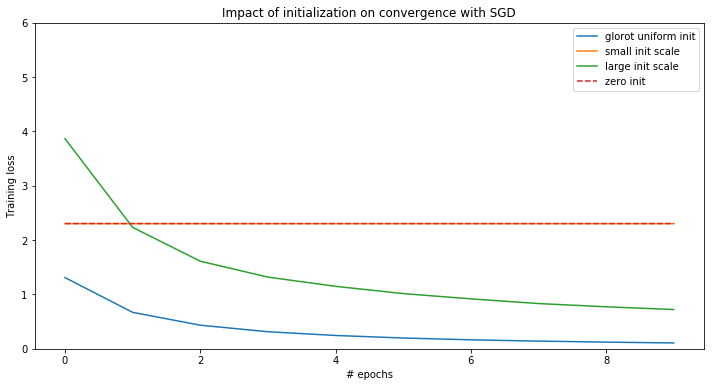

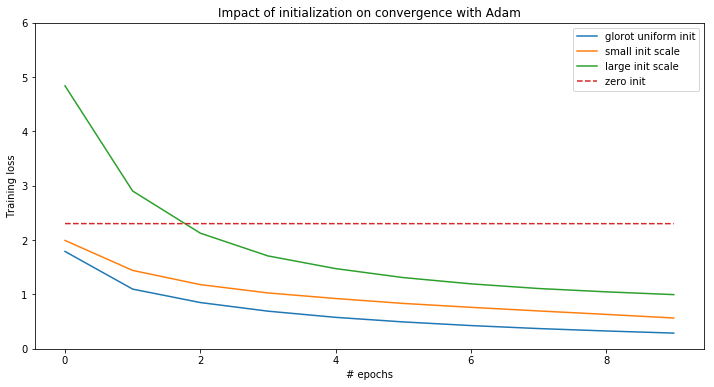

In [36]:
# %load solutions/keras_initializations.py
def large_scale_init(shape, name=None):
    return initializations.normal(shape, scale=1, name=name)


def small_scale_init(shape, name=None):
    return initializations.normal(shape, scale=1e-3, name=name)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('Adam', optimizers.Adam()),
#     ('SGD + Nesterov momentum', optimizers.SGD(
#             lr=0.1, momentum=0.9,nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(H, input_dim=N, init=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, init=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, init=init))
        model.add(Activation("softmax"))
        
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            nb_epoch=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)

In [37]:
# %load solutions/keras_initializations_analysis.py
# Analysis
#
# If the network is initialized to zero weights, the activations of the hidden
# layers are always set to zero, whatever the value of the inputs. The gradient
# is always zero for all training samples and no learning can happen with any
# gradient-based optimizer (SGD, Adam...): the loss stays constant.
#
# A network with null weights has null gradients but this not a local minimum
# (nor a local maximum): it is a saddle point at the center of a neighborhood
# with very low gradients. 
#
# Therefore when the scale of a random initializations of the weights is too
# small, SGD has a hard time evading that area of low gradients. Adding
# momentum can help but especially for deep networks it can take many epochs to
# evade the area.
#
# Initializing the weights with large random values will make the output
# distribution (softmax) very peaky: the network is very "confident" of its
# predictions even if they are completely random. This leads to a very high
# initial loss value.
#
# The softmax function does not saturate (bad classification always have a
# non-zero gradient). However the intermediate tanh layers can saturate,
# therefore squashing the gradients and making the network train much slower. 
#
# The Glorot uniform init uses a scale that depends on the dimensions of the
# weigh matrix so has to preserve the average norm of activations and flowing
# gradients so as to make learning possible. Keras provides alternatives that
# can be better in some cases. Please refer to the references in the Keras
# documentation to learn more on the theoretical justifications behind those
# schemes.
#
# Adam tends to be more robust when it comes to bad initialization thanks to
# its per-weight learning rate adjustments but still benefits from a good
# initialization.
#
# More on this in a later class on optimization issues. For now  just remember
# that if you network fails to learn at all (the loss stays at its initial
# value):
#
# - ensure that the weights are properly initialized,
# - inspect the per-layer gradient norms to help identify the bad layer,
# - use Adam instead of SGD as your default go to initializer.


# II) Numpy Implementation

## a) Logistic Regression

In this section we will implement a logistic regression model trainable with SGD using numpy. Here are the objectives:

1/ Implement a simple forward model with no hidden layer (equivalent to a logistic regression):
note: shape, transpose of W with regards to course
$y = softmax(\mathbf{W} \dot x + b)$

2/ build a predict function which returns the most probable class given an input $x$

3/ build an accuracy function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$

4/ build a grad function which computes $\frac{d}{dW} -\log(softmax(W \dot x + b))$ for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

5/ build a train function which uses the grad function output to update $\mathbf{W}$ and $b$


First let's define a helper function to compute the one hot encoding of an integer array for a fixed number of classes (similar to keras' `to_categorical`):

In [38]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [39]:
one_hot(10, 3)

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
one_hot(10, [0, 4, 9, 1])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Now let's implement the softmax vector function:

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

In [41]:
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=0)

Make sure that this works one vector at a time (and check that the components sum to one):

In [42]:
print(softmax([10, 2, -3]))

[  9.99662391e-01   3.35349373e-04   2.25956630e-06]


Note that a naive implementation of softmax might not be able process a batch of activations in a single call:

In [43]:
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))

[[  9.99983299e-01   4.74258732e-02   9.99999959e-01]
 [  1.67014218e-05   9.52574127e-01   4.13993755e-08]]


Here is a way to implement softmax that works both for an individal vector of activations and for a batch of activation vectors at once:

In [44]:
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)


print("softmax of a single vector:")
print(softmax([10, 2, -3]))
print(np.sum(softmax([10, 2, -3])))

softmax of a single vector:
[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
1.0


In [45]:
print("sotfmax of 2 vectors:")
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))
print(np.sum(softmax(X), axis=1))

sotfmax of 2 vectors:
[[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
 [  2.47262316e-03   9.97527377e-01   1.38536042e-11]]
[ 1.  1.]


Implement a function that given the true one-hot encoded class `Y_true` and and some predicted probabilities `Y_pred` returns the negative log likelihood.

In [46]:
def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    epsilon=1e-10 # Make sure 0 is excluded
    ll = np.sum(np.log(Y_pred + epsilon) * Y_true)
    return - np.mean(ll)


# Make sure that it works for a simple sample at a time
print(nll([1, 0, 0], [.99, 0.01, 0]))

0.0100503357525


Check that the nll of a very confident yet bad prediction is a much higher positive number:

In [47]:
print(nll([1, 0, 0], [0.01, 0.01, .98]))

4.60517017599


Make sure that your implementation can compute the average negative log likelihood of a group of predictions: `Y_pred` and `Y_true` can therefore be past as 2D arrays:

In [48]:
def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    epsilon=1e-10
    ll = np.sum(np.log(Y_pred + epsilon) * Y_true, axis=1)
    return - np.mean(ll)

In [49]:
# Check that the average NLL of the following 3 almost perfect
# predictions is close to 0
Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

print(nll(Y_true, Y_pred))

0.00335011185083


In [50]:
# %load solutions/numpy_nll.py
EPSILON = 1e-8


def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)


# Make sure that it works for a simple sample at a time
print(nll([1, 0, 0], [.99, 0.01, 0]))

# Check that the nll of a very confident yet bad prediction
# is very high:
print(nll([1, 0, 0], [0.01, 0.01, .98]))

# Check that the average NLL of the following 3 almost perfect
# predictions is close to 0
Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])
print(nll(Y_true, Y_pred))

0.0100503257525
4.60516918599
0.0033501019175


Let us now study the following linear model trainable by SGD, **one sample at a time**.

In [51]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size), high=0.1, low=-0.1)
        self.b = np.random.uniform(size=(output_size), high=0.1, low=-0.1)
        self.output_size = output_size
        
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return softmax(Z)
    
    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)
    
    def grad_loss(self, x, y_true):
        y_pred = self.forward(x)
        dnll_output =  y_pred - one_hot(self.output_size, y_true)
        grad_W = np.outer(x, dnll_output)
        grad_b = dnll_output
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # Traditional SGD update without momentum
        grads = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads["W"]
        self.b = self.b - learning_rate * grads["b"]      
        
    def loss(self, x, y):
        return nll(one_hot(self.output_size, y), self.forward(x))

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [52]:
# Build a model and test its forward inference
n_features = X_train.shape[1]
n_classes = Y_train.shape[1]
lr = LogisticRegression(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_test, y_test)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

Evaluation of the untrained model:
train loss: 2.5240, train acc: 0.063, test acc: 0.067


0


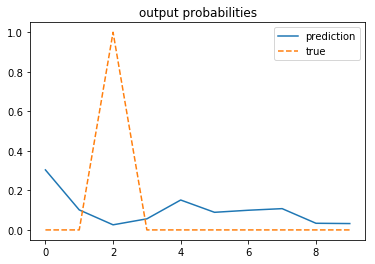

In [53]:
# Test the untrained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

In [54]:
# Training for one epoch
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))

Update #0, train loss: 2.4833, train acc: 0.067, test acc: 0.074
Update #100, train loss: 1.3573, train acc: 0.662, test acc: 0.678
Update #200, train loss: 0.8847, train acc: 0.847, test acc: 0.863
Update #300, train loss: 0.6498, train acc: 0.895, test acc: 0.907
Update #400, train loss: 0.5377, train acc: 0.906, test acc: 0.911
Update #500, train loss: 0.4660, train acc: 0.916, test acc: 0.922
Update #600, train loss: 0.4058, train acc: 0.929, test acc: 0.926
Update #700, train loss: 0.3665, train acc: 0.936, test acc: 0.941
Update #800, train loss: 0.3447, train acc: 0.935, test acc: 0.948
Update #900, train loss: 0.3196, train acc: 0.942, test acc: 0.952
Update #1000, train loss: 0.3003, train acc: 0.943, test acc: 0.948
Update #1100, train loss: 0.2806, train acc: 0.946, test acc: 0.956
Update #1200, train loss: 0.2694, train acc: 0.947, test acc: 0.967
Update #1300, train loss: 0.2601, train acc: 0.946, test acc: 0.941
Update #1400, train loss: 0.2469, train acc: 0.952, test acc

2


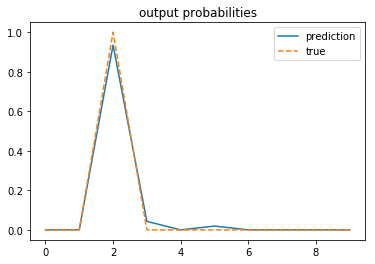

In [55]:
# Evaluate the trained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

## b) Feedforward Multilayer

The objective of this section is to implement the backpropagation algorithm (SGD with the chain rule) on a single layer neural network using the sigmoid activation function.

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

In [56]:
# On l'utilise pas parce qu'elle ecrase trop le gradient
def sigmoid(X):
    return 1./(1+np.exp(-X))


def dsigmoid(X):
    tmp = sigmoid(X)
    return tmp*(1-tmp)

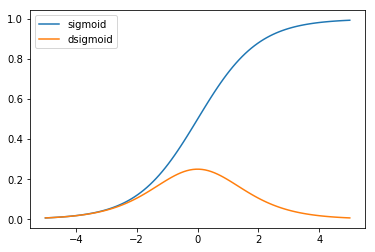

In [57]:
# %load solutions/sigmoid.py
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

- Implement `forward` and `forward_keep_all` functions for a model with a hidden layer, similar to the first one in Keras:
  - $h = sigmoid(\mathbf{W}^h x + b^h)$
  - $y = softmax(\mathbf{W}^o h + b^o)$

Notes: 
  - try to keep the code as similar as possible as the previous one;
  - `forward_keep_activations` is similar to forward, but also returns hidden activations and pre activations;

- update the grad function to compute all gradients; check that the gradients are well defined;

- implement the `train` and `loss` functions.

Bonus: reimplementing all from scratch without looking at the solution of the `LogisticRegression` is an excellent exercise.

In [58]:
EPSILON = 1e-8
scale=.01

class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform((input_size, hidden_size), low=-scale, high=scale)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform((hidden_size, output_size), low=-scale, high=scale)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
    def forward(self, X):
        h = sigmoid(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(X, self.W_o) + self.b_o)
        return y
        
    def forward_keep_activations(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        y = softmax(np.dot(X, self.W_o) + self.b_o)
        return y, h, z_h
    
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, x, y_true):
        # Need the forward pass !
        y, h, z_h = self.forward_keep_activations(X)
        
        # Compute gradient from the end to the beginning
        grad_z_o = y - one_hot(self.output_size, y_true)
        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        return {"W_h": grad_W_h, "b_h": grad_b_h, "W_o": grad_W_o, "b_o": grad_b_o}

    def train(self, x, y, learning_rate):
        # Pass is an SGD update: x_{t+1} = x_t - \nu * grad(x_t)
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]
        pass

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(x))
        else:
            return np.argmax(self.forward(x), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [59]:
# %load solutions/neural_net.py
class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size,
                 activation_funcs=(sigmoid, dsigmoid, ''), init='uniform'):
        
        if init=='uniform':
            self.W_h = np.random.uniform(
                size=(input_size, hidden_size), high=0.01, low=-0.01)
            self.W_o = np.random.uniform(
                size=(hidden_size, output_size), high=0.01, low=-0.01)
        else:
            self.W_h = np.zeros((input_size, hidden_size))
            self.W_o = np.zeros((hidden_size, output_size))
            
        self.b_h = np.zeros(hidden_size)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
        self.activation, self.grad_act, _ = activation_funcs
        
    def forward(self, X):
        h = self.activation(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        return y
    
    def forward_keep_activations(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = self.activation(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)
        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * self.grad_act(z_h)
        grad_W_h = np.outer(X, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [60]:
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes)

In [61]:
model.loss(X_train, y_train)

2.3026486402130684

In [62]:
model.accuracy(X_train, y_train)

0.098886705959397511

5


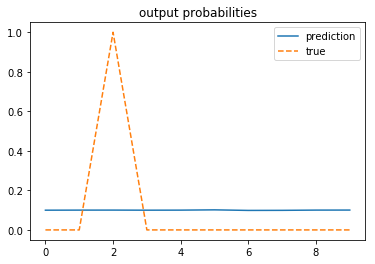

In [63]:
sample_idx = 0
plt.plot(model.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(model.predict(X_train[sample_idx]))

In [64]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.115
Epoch #1, train loss: 0.4051, train acc: 0.881, test acc: 0.826
Epoch #2, train loss: 0.1779, train acc: 0.962, test acc: 0.930
Epoch #3, train loss: 0.1240, train acc: 0.975, test acc: 0.941
Epoch #4, train loss: 0.0943, train acc: 0.981, test acc: 0.941
Epoch #5, train loss: 0.0799, train acc: 0.984, test acc: 0.926
Epoch #6, train loss: 0.0613, train acc: 0.991, test acc: 0.944
Epoch #7, train loss: 0.0486, train acc: 0.995, test acc: 0.952
Epoch #8, train loss: 0.0419, train acc: 0.995, test acc: 0.956
Epoch #9, train loss: 0.0365, train acc: 0.995, test acc: 0.959
Epoch #10, train loss: 0.0325, train acc: 0.997, test acc: 0.963
Epoch #11, train loss: 0.0290, train acc: 0.997, test acc: 0.952
Epoch #12, train loss: 0.0273, train acc: 0.997, test acc: 0.967
Epoch #13, train loss: 0.0247, train acc: 0.998, test acc: 0.963
Epoch #14, train loss: 0.0229, train acc: 0.998, test acc: 0.963
Epoch #15, train loss: 0.0214, t

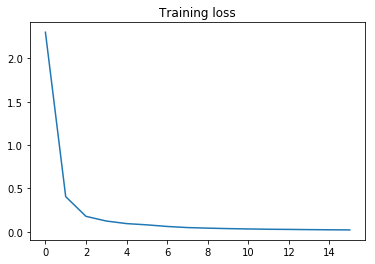

In [65]:
plt.plot(losses)
plt.title("Training loss");

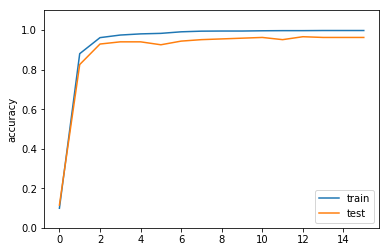

In [66]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

## c) Exercises

### i - Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.

---
- To make the network more manageable, we slightly edited the NeuralNetwork class
#### Play with hyperparameters

In [67]:
def tanh(X):
    return 2. / (1 + np.exp(-2*X)) - 1

def grad_tanh(X):
    return 1 - tanh(X)**2

In [68]:
learning_rates = [.01, .1, 1]
hidden_layer_sizes = [5, 10, 15, 20]
inits = ['uniform', 'zero']
activation_functions = [(sigmoid, dsigmoid, 'sigmoid'), (tanh, grad_tanh, 'tanh')]

In [69]:
import itertools
n_epoch = 15
print('Training on %d epochs'%n_epoch)

print(' | '.join([name.center(10) for name in ['init', 'lr', 'n_hidden',
                                              'activation', 'loss', 'acc train', 'acc test']]))

for init, learning_rate, n_hidden, activation_function in itertools.product(*(inits,
                                                                              learning_rates,
                                                                              hidden_layer_sizes,
                                                                              activation_functions)):
    model = NeuralNet(n_features, n_hidden, n_classes, activation_function, init)
    losses, accuracies, accuracies_test = [], [], []
    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    for epoch in range(n_epoch):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, 0.1)
        losses.append(model.loss(X_train, y_train))
        accuracies.append(model.accuracy(X_train, y_train))
        accuracies_test.append(model.accuracy(X_test, y_test))
    print(' | '.join([('%s'%init).rjust(10),
                      ('%0.2f'%learning_rate).rjust(10),
                      ('%d'%n_hidden).rjust(10),
                      ('%s'%activation_function[2]).rjust(10),
                      ('%0.4f'%losses[-1]).rjust(10),
                      ('%0.4f'%accuracies[-1]).rjust(10),
                      ('%0.4f'%accuracies_test[-1]).rjust(10)]))

Training on 15 epochs
   init    |     lr     |  n_hidden  | activation |    loss    | acc train  |  acc test 
   uniform |       0.01 |          5 |    sigmoid |     0.1856 |     0.9522 |     0.8926
   uniform |       0.01 |          5 |       tanh |     0.2495 |     0.9476 |     0.9148
   uniform |       0.01 |         10 |    sigmoid |     0.0207 |     0.9980 |     0.9444
   uniform |       0.01 |         10 |       tanh |     0.0617 |     0.9810 |     0.9481
   uniform |       0.01 |         15 |    sigmoid |     0.0087 |     1.0000 |     0.9741
   uniform |       0.01 |         15 |       tanh |     0.0044 |     1.0000 |     0.9481
   uniform |       0.01 |         20 |    sigmoid |     0.0071 |     1.0000 |     0.9741
   uniform |       0.01 |         20 |       tanh |     0.0029 |     0.9993 |     0.9593
   uniform |       0.10 |          5 |    sigmoid |     0.1961 |     0.9463 |     0.8852
   uniform |       0.10 |          5 |       tanh |     0.2857 |     0.9293 |     0.8889

- As expected, 0 init gives very poor results
- Sigmoid and tanh both achieve best results: uniform |       0.10 |         15 |    * |     0.0096 |     1.0000 |     0.9778
- For this problem, 5 layers does not look reasonnable as it gives poorest results
----
#### 2 hidden layers

In [70]:
class NeuralNet2HL():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size,
                 activation_funcs=(sigmoid, dsigmoid, ''), init='uniform'):
        
        if init=='uniform':
            self.W_h1 = np.random.uniform(
                size=(input_size, hidden_size1), high=0.01, low=-0.01)
            self.W_h2 = np.random.uniform(
                size=(hidden_size1, hidden_size2), high=0.01, low=-0.01)
            self.W_o = np.random.uniform(
                size=(hidden_size2, output_size), high=0.01, low=-0.01)
        else:
            self.W_h1 = np.zeros((input_size, hidden_size1))
            self.W_h2 = np.zeros((hidden_size1, hidden_size2))
            self.W_o = np.zeros((hidden_size2, output_size))
            
        self.b_h1 = np.zeros(hidden_size1)
        self.b_h2 = np.zeros(hidden_size2)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
        self.activation, self.grad_act, _ = activation_funcs
        
    def forward(self, X):
        z_h1 = np.dot(X, self.W_h1) + self.b_h1
        h1 = self.activation(z_h1)
        z_h2 = np.dot(h1, self.W_h2) + self.b_h2
        h2 = self.activation(z_h2)
        y = softmax(np.dot(h2, self.W_o) + self.b_o)
        return y
    
    def forward_keep_activations(self, X):
        z_h1 = np.dot(X, self.W_h1) + self.b_h1
        h1 = self.activation(z_h1)
        z_h2 = np.dot(h1, self.W_h2) + self.b_h2
        h2 = self.activation(z_h2)
        y = softmax(np.dot(h2, self.W_o) + self.b_o)
        return y, h2, z_h2, h1, z_h1
    
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))
    
    def grad_loss(self, X, y_true):
        y, h2, z_h2, h1, z_h1 = self.forward_keep_activations(X)
        
        grad_z_o = y - one_hot(self.output_size, y_true)
        grad_W_o = np.outer(h2, grad_z_o)
        grad_b_o = grad_z_o
        
        grad_h2 = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h2 = grad_h2 * self.grad_act(z_h2)
        grad_W_h2 = np.outer(h1, grad_z_h2)
        grad_b_h2 = grad_z_h2
        
        grad_h1 = np.dot(grad_z_h2, np.transpose(self.W_h2))
        grad_z_h1 = grad_h1 * self.grad_act(z_h1)
        grad_W_h1 = np.outer(X, grad_z_h1)
        grad_b_h1 = grad_z_h1
        grads = {"W_h1": grad_W_h1, "b_h1": grad_b_h1, "W_h2": grad_W_h2, "b_h2": grad_b_h2,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h1 = self.W_h1 - learning_rate * grads["W_h1"]
        self.b_h1 = self.b_h1 - learning_rate * grads["b_h1"]
        self.W_h2 = self.W_h2 - learning_rate * grads["W_h2"]
        self.b_h2 = self.b_h2 - learning_rate * grads["b_h2"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

- Code may have been propper. In particular, could be generalized to an arbitrary of hidden layers, as formula are always the same. However, we're not keras...

In [71]:
n_hidden1 = 10
n_hidden2 = 8
model = NeuralNet2HL(n_features, n_hidden1, n_hidden2, n_classes)

In [72]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(30):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.115
Epoch #1, train loss: 2.2813, train acc: 0.102, test acc: 0.089
Epoch #2, train loss: 1.8215, train acc: 0.224, test acc: 0.244
Epoch #3, train loss: 1.6595, train acc: 0.255, test acc: 0.263
Epoch #4, train loss: 1.4439, train acc: 0.409, test acc: 0.385
Epoch #5, train loss: 1.0598, train acc: 0.542, test acc: 0.548
Epoch #6, train loss: 0.6671, train acc: 0.695, test acc: 0.674
Epoch #7, train loss: 0.4658, train acc: 0.853, test acc: 0.800
Epoch #8, train loss: 0.3244, train acc: 0.919, test acc: 0.893
Epoch #9, train loss: 0.2055, train acc: 0.954, test acc: 0.911
Epoch #10, train loss: 0.1439, train acc: 0.965, test acc: 0.930
Epoch #11, train loss: 0.1075, train acc: 0.976, test acc: 0.930
Epoch #12, train loss: 0.0948, train acc: 0.977, test acc: 0.937
Epoch #13, train loss: 0.0818, train acc: 0.981, test acc: 0.933
Epoch #14, train loss: 0.0825, train acc: 0.978, test acc: 0.933
Epoch #15, train loss: 0.1271, t

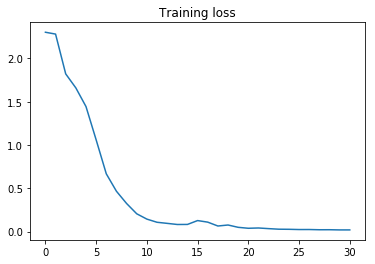

In [73]:
plt.plot(losses)
plt.title("Training loss");

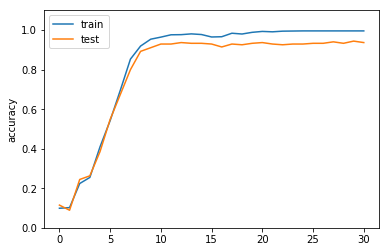

In [74]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

- Longer to train since more paramters

-----
### ii - Mini-batches

- Bonus: the current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.

In [75]:
# %load solutions/neural_net.py
class NeuralNetMB():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size,
                 activation_funcs=(sigmoid, dsigmoid, ''), init='uniform', batch_size=32):
        
        if init=='uniform':
            self.W_h = np.random.uniform(
                size=(input_size, hidden_size), high=0.01, low=-0.01)
            self.W_o = np.random.uniform(
                size=(hidden_size, output_size), high=0.01, low=-0.01)
        else:
            self.W_h = np.zeros((input_size, hidden_size))
            self.W_o = np.zeros((hidden_size, output_size))
            
        self.b_h = np.zeros(hidden_size)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
        self.activation, self.grad_act, _ = activation_funcs
        
        self.batch_size = batch_size
        
    def forward(self, X):
        h = self.activation(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        return y
    
    def forward_keep_activations(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = self.activation(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)
        grad_W_o = np.dot(h.T, grad_z_o)
        grad_b_o = np.mean(grad_z_o, axis=0)
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * self.grad_act(z_h)
        grad_W_h = np.dot(X.T, grad_z_h)
        grad_b_h = np.mean(grad_z_h, axis=0)
        self.grads = {"W_h": grad_W_h / self.batch_size, "b_h": grad_b_h,
                      "W_o": grad_W_o / self.batch_size, "b_o": grad_b_o}
        return self.grads

    def train(self, x, y, learning_rate):
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [76]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [85]:
from numpy.linalg import norm
def train_mb(batch_size, n_epoch=100, lr=.1):
    n_hidden = 20
    model = NeuralNetMB(n_features, n_hidden, n_classes, batch_size=batch_size)
    
    losses, accuracies, accuracies_test = [], [], []
    avg_grad_norm_W_h, avg_grad_norm_W_o, avg_grad_norm_b_h, avg_grad_norm_b_o = [], [], [], []
    
    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
    for epoch in range(n_epoch):
        grad_norm_W_h = []
        grad_norm_W_o = []
        grad_norm_b_h = []
        grad_norm_b_o = []
        for batch in iterate_minibatches(X_train, y_train, batch_size, shuffle=False):
            x_batch, y_batch = batch
            model.train(x_batch, y_batch, lr)
            grad_norm_W_h.append(norm(model.grads["W_h"]))
            grad_norm_W_o.append(norm(model.grads["W_o"]))
            grad_norm_b_h.append(norm(model.grads["b_h"]))
            grad_norm_b_o.append(norm(model.grads["b_o"]))
        avg_grad_norm_W_h.append(np.mean(grad_norm_W_h))
        avg_grad_norm_W_o.append(np.mean(grad_norm_W_o))
        avg_grad_norm_b_h.append(np.mean(grad_norm_b_h))
        avg_grad_norm_b_o.append(np.mean(grad_norm_b_o))
        
        losses.append(model.loss(X_train, y_train))
        accuracies.append(model.accuracy(X_train, y_train))
        accuracies_test.append(model.accuracy(X_test, y_test))
    return (losses, accuracies, accuracies_test, avg_grad_norm_W_h,
            avg_grad_norm_W_o, avg_grad_norm_b_h, avg_grad_norm_b_o)

batch size | exec time 
         1 |     15.467
         8 |      2.514
        16 |      1.542
        32 |      0.943
        64 |      0.708
       128 |      0.633
       256 |      0.458


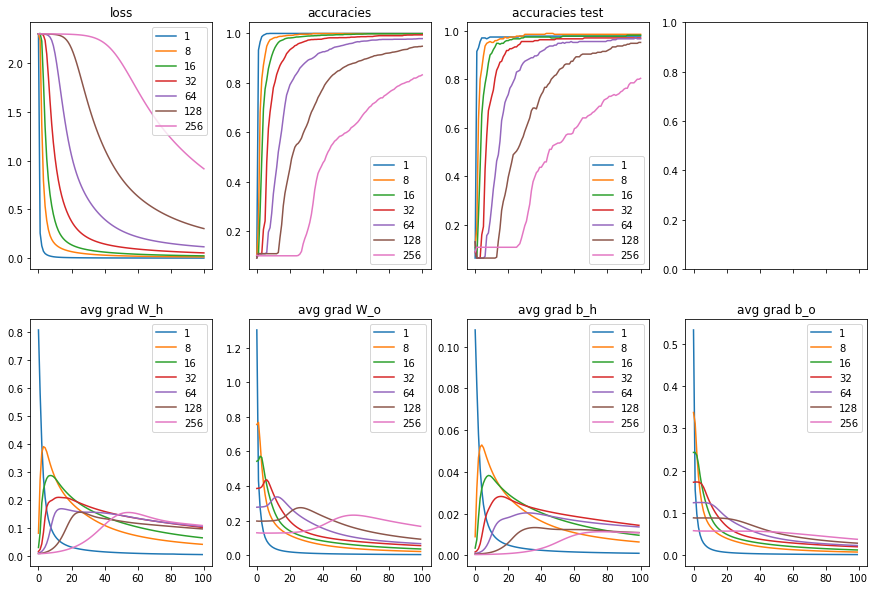

In [86]:
import time

batch_sizes = [1, 8, 16, 32, 64, 128, 256]

print(' | '.join([name.center(10) for name in ['batch size', 'exec time']]))

f, axarr = plt.subplots(2, 4, figsize=(15, 10), sharex= True)
axarr[0, 0].set_title('loss')
axarr[0, 1].set_title('accuracies')
axarr[0, 2].set_title('accuracies test')
axarr[1, 0].set_title('avg grad W_h')
axarr[1, 1].set_title('avg grad W_o')
axarr[1, 2].set_title('avg grad b_h')
axarr[1, 3].set_title('avg grad b_o')
for batch_size in batch_sizes:
    start_time = time.time()
    (losses, accuracies, accuracies_test,
     avg_grad_norm_W_h, avg_grad_norm_W_o, avg_grad_norm_b_h, avg_grad_norm_b_o) = train_mb(batch_size)
    print(' | '.join([('%d'%batch_size).rjust(10),
                      ('%0.3f'%(time.time() - start_time)).rjust(10)]))
    axarr[0, 0].plot(losses, label=str(batch_size))
    axarr[0, 1].plot(accuracies, label=str(batch_size))
    axarr[0, 2].plot(accuracies_test, label=str(batch_size))
    axarr[1, 0].plot(avg_grad_norm_W_h, label=str(batch_size))
    axarr[1, 1].plot(avg_grad_norm_W_o, label=str(batch_size))
    axarr[1, 2].plot(avg_grad_norm_b_h, label=str(batch_size))
    axarr[1, 3].plot(avg_grad_norm_b_o, label=str(batch_size))
axarr[0, 0].legend(loc='best')
axarr[0, 1].legend(loc='best')
axarr[0, 2].legend(loc='best')
axarr[1, 0].legend(loc='best')
axarr[1, 1].legend(loc='best')
axarr[1, 2].legend(loc='best')
axarr[1, 3].legend(loc='best')

### iii - Momentum

- Bonus: Implement momentum

In [87]:
# %load solutions/neural_net.py
class NeuralNetNesterov():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size,
                 activation_funcs=(sigmoid, dsigmoid, ''), init='uniform', lr=.1, gamma=.9):
        
        if init=='uniform':
            self.W_h = np.random.uniform(
                size=(input_size, hidden_size), high=0.01, low=-0.01)
            self.W_o = np.random.uniform(
                size=(hidden_size, output_size), high=0.01, low=-0.01)
        else:
            self.W_h = np.zeros((input_size, hidden_size))
            self.W_o = np.zeros((hidden_size, output_size))
            
        self.b_h = np.zeros(hidden_size)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
        self.activation, self.grad_act, _ = activation_funcs
        
        self.first_iter = True
        self.lr = lr
        self.gamma = gamma
        
    def forward(self, X):
        h = self.activation(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        return y
    
    def forward_keep_activations(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = self.activation(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)
        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * self.grad_act(z_h)
        grad_W_h = np.outer(X, grad_z_h)
        grad_b_h = grad_z_h
        if self.first_iter:
            self.grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                          "W_o": grad_W_o, "b_o": grad_b_o}
            self.first_iter = False
        else:
            self.grads["W_h"] = self.grads["W_h"]*self.gamma + self.lr*grad_W_h
            self.grads["W_o"] = self.grads["W_o"]*self.gamma + self.lr*grad_W_o
            self.grads["b_h"] = self.grads["b_h"]*self.gamma + self.lr*grad_b_h
            self.grads["b_o"] = self.grads["b_o"]*self.gamma + self.lr*grad_b_o
        return True

    def train(self, x, y):
        grads = self.grad_loss(x, y)
        self.W_h -= self.grads["W_h"]
        self.W_o -= self.grads["W_o"]
        self.b_h -= self.grads["b_h"]
        self.b_o -= self.grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [88]:
model = NeuralNetNesterov(n_features, 10, n_classes)

losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.115
Epoch #1, train loss: 0.7066, train acc: 0.804, test acc: 0.815
Epoch #2, train loss: 0.9706, train acc: 0.792, test acc: 0.811
Epoch #3, train loss: 0.7495, train acc: 0.821, test acc: 0.804
Epoch #4, train loss: 0.7270, train acc: 0.831, test acc: 0.807
Epoch #5, train loss: 0.4937, train acc: 0.853, test acc: 0.833
Epoch #6, train loss: 0.4995, train acc: 0.853, test acc: 0.811
Epoch #7, train loss: 0.3828, train acc: 0.904, test acc: 0.881
Epoch #8, train loss: 0.3305, train acc: 0.916, test acc: 0.881
Epoch #9, train loss: 0.6555, train acc: 0.861, test acc: 0.822
Epoch #10, train loss: 0.6012, train acc: 0.863, test acc: 0.811
Epoch #11, train loss: 0.5221, train acc: 0.880, test acc: 0.859
Epoch #12, train loss: 0.4355, train acc: 0.888, test acc: 0.900
Epoch #13, train loss: 0.4460, train acc: 0.913, test acc: 0.885
Epoch #14, train loss: 0.4705, train acc: 0.914, test acc: 0.896
Epoch #15, train loss: 0.4755, t

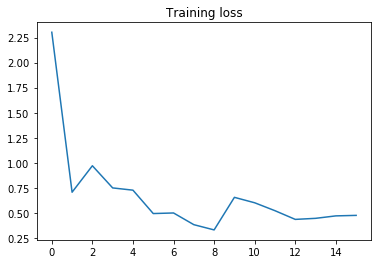

In [89]:
plt.plot(losses)
plt.title("Training loss")

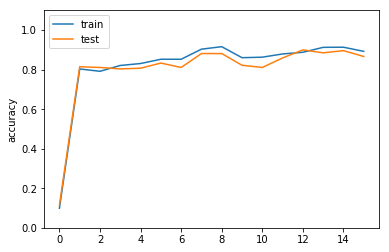

In [90]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

# III) TensorFlow Implementation

TensorFlow is a symbolic graph computation engine, that allows automatic differentiation of each node
- https://www.tensorflow.org 
- https://www.tensorflow.org/tutorials/mnist/tf/

TensorFlow builds where nodes may be:
- **constant:** constants tensors, such as a learning rate
- **Variables:** any tensor, such as parameters of the models
- **Placeholders:** placeholders for inputs and outputs of your models
- many other types of nodes (functions, loss, ...)

The graph is symbolic, no computation is performed until a `Session` is defined and the command `run` or `eval` is invoked. TensorFlow may run this computation on (multiple) CPUs or GPUs

In [91]:
import tensorflow as tf

a = tf.constant(3)
b = tf.constant(2)
c = tf.Variable(0)
c = a + b
with tf.Session() as sess:
    print(sess.run(c))

5


In [92]:
X = tf.placeholder("float32", name="input")
Y = X + tf.constant(3.0)
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:2}))

5.0


**Note: batches in inputs**
- the first dimension of the input is usually kept for the batch dimension. A typical way to define an input placeholder with a 1D tensor of 128 dimensions, is:
```
X = tf.placeholder("float32", shape=[None, 128])
```

## a) Build a model using TensorFlow

- Using TensorFlow, build a similar model (one hidden layer) as you previously did
- the input will be a batch coming from X_train, and the output will be a batch of ints

In [93]:
# helper functions

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def accuracy(y_pred, y=y_test):
    return np.mean(np.argmax(y_pred, axis=1) == y)

In [94]:
'''
https://www.tensorflow.org/tutorials/mnist/tf/
'''

# hyperparams
batch_size = 32
hid_size = 15
learning_rate = 0.1
num_epochs = 10
input_size = X_train.shape[1]
output_size = 10

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# model and weights
W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])

h = tf.nn.sigmoid(tf.matmul(X,W_h) + b_h)

W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
                   
logits = tf.matmul(h, W_o) + b_o

# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y, name='xentropy')
# Softmax is taken into account
loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# build predict node
predict = tf.nn.softmax(logits)

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

In [97]:
# %load solutions/tf_model.py
# hyperparams
batch_size = 32
hid_size = 15
learning_rate = 0.01
num_epochs = 20
input_size = X_train.shape[1]
output_size = 10

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# build the model and weights
W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])
W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
h = tf.nn.sigmoid(tf.matmul(X,W_h)+b_h)
out_act = tf.matmul(h, W_o)+b_o

# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(out_act, y)
loss = tf.reduce_sum(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

predict = tf.nn.softmax(out_act)

# Initialization of all variables in the graph
init = tf.global_variables_initializer()


epoch: 0 train accuracy: 0.133 test accuracy: 0.093
epoch: 1 train accuracy: 0.521 test accuracy: 0.470
epoch: 2 train accuracy: 0.771 test accuracy: 0.730
epoch: 3 train accuracy: 0.828 test accuracy: 0.807
epoch: 4 train accuracy: 0.871 test accuracy: 0.856
epoch: 5 train accuracy: 0.904 test accuracy: 0.893
epoch: 6 train accuracy: 0.932 test accuracy: 0.930
epoch: 7 train accuracy: 0.954 test accuracy: 0.937
epoch: 8 train accuracy: 0.961 test accuracy: 0.944
epoch: 9 train accuracy: 0.968 test accuracy: 0.952
epoch: 10 train accuracy: 0.974 test accuracy: 0.956
epoch: 11 train accuracy: 0.974 test accuracy: 0.959
epoch: 12 train accuracy: 0.977 test accuracy: 0.963
epoch: 13 train accuracy: 0.980 test accuracy: 0.963
epoch: 14 train accuracy: 0.982 test accuracy: 0.967
epoch: 15 train accuracy: 0.984 test accuracy: 0.967
epoch: 16 train accuracy: 0.986 test accuracy: 0.967
epoch: 17 train accuracy: 0.986 test accuracy: 0.967
epoch: 18 train accuracy: 0.987 test accuracy: 0.967
epo

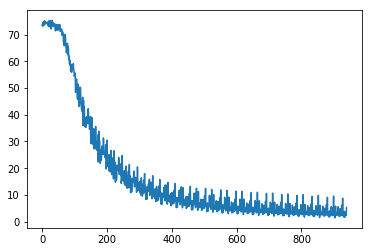

In [98]:
# run training
with tf.Session() as sess: 
    sess.run(init)
    
    losses = []
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Build batches of batch_size            
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
            
            # Run train operator and monitor loss
            _, l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
        
        # For each epoch, run accuracy on train and test
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f"
              % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
    
    # For monitoring purposes
    file_writer = tf.summary.FileWriter('./tensorflow_summaries', sess.graph)    
plt.plot(losses);

## b) Exercises

### Bonus:
- add L2 regularization with $\lambda = 10^{-4}$

In [99]:
# hyperparams
batch_size = 32
hid_size = 15
learning_rate = .1
num_epochs = 30
input_size = X_train.shape[1]
output_size = 10
lbda = 1e-4

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# build the model and weights
W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])
W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
h = tf.nn.sigmoid(tf.matmul(X,W_h)+b_h)
out_act = tf.matmul(h, W_o)+b_o

# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(out_act, y)
cross_entropy_loss = tf.reduce_mean(cross_entropy)
loss = (cross_entropy_loss + lbda * (tf.nn.l2_loss(W_h) + tf.nn.l2_loss(W_o)))
#loss = cross_entropy_loss

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

predict = tf.nn.softmax(out_act)

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

epoch: 0 train accuracy: 0.109 test accuracy: 0.063
epoch: 1 train accuracy: 0.109 test accuracy: 0.063
epoch: 2 train accuracy: 0.177 test accuracy: 0.133
epoch: 3 train accuracy: 0.300 test accuracy: 0.259
epoch: 4 train accuracy: 0.463 test accuracy: 0.407
epoch: 5 train accuracy: 0.551 test accuracy: 0.511
epoch: 6 train accuracy: 0.642 test accuracy: 0.604
epoch: 7 train accuracy: 0.713 test accuracy: 0.678
epoch: 8 train accuracy: 0.755 test accuracy: 0.719
epoch: 9 train accuracy: 0.788 test accuracy: 0.756
epoch: 10 train accuracy: 0.813 test accuracy: 0.778
epoch: 11 train accuracy: 0.830 test accuracy: 0.811
epoch: 12 train accuracy: 0.853 test accuracy: 0.826
epoch: 13 train accuracy: 0.868 test accuracy: 0.841
epoch: 14 train accuracy: 0.881 test accuracy: 0.867
epoch: 15 train accuracy: 0.893 test accuracy: 0.885
epoch: 16 train accuracy: 0.904 test accuracy: 0.889
epoch: 17 train accuracy: 0.913 test accuracy: 0.896
epoch: 18 train accuracy: 0.916 test accuracy: 0.900
epo

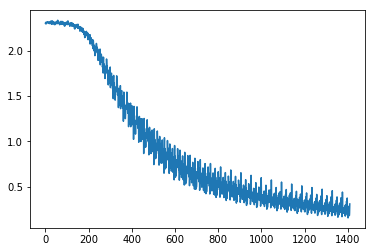

In [100]:
# run training
with tf.Session() as sess: 
    sess.run(init)
    
    losses = []
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Build batches of batch_size            
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
            
            # Run train operator and monitor loss
            _, l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
        
        # For each epoch, run accuracy on train and test
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f"
              % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
    
    # For monitoring purposes
    file_writer = tf.summary.FileWriter('./tensorflow_summaries', sess.graph)    
plt.plot(losses);

- train with arbitrary number of layers by only defining layer sizes
- you may use tensorboard (https://www.tensorflow.org/how_tos/summaries_and_tensorboard/) to monitor loss and display graph
- follow the official tensorflow tutorial: https://www.tensorflow.org/tutorials/mnist/tf/

In [101]:
# hyperparams
batch_size = 32
hid_size = 15

##### Layers definition #####
n_layers = 2
layer_sizes = np.random.randint(5, 20, size=n_layers)

learning_rate = 0.1
num_epochs = 15
input_size = X_train.shape[1]
output_size = 10

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# build the model and weights
weights = []
biases = []
zs = []
hs = []
for layer, layer_size in enumerate(layer_sizes):
    
    b_h = init_weights([layer_size])
    
    if layer==0:
        W_h = init_weights([input_size, layer_size])
        z_h = tf.matmul(X, W_h) + b_h
    else:
        W_h = init_weights([prev_layer_size, layer_size])
        z_h = tf.matmul(hs[layer-1], W_h) + b_h
    
    h = tf.nn.sigmoid(z_h)
    
    weights.append(W_h)
    biases.append(b_h)
    zs.append(z_h)
    hs.append(h)
    
    prev_layer_size = layer_size
    
W_o = init_weights([layer_sizes[-1], output_size])
b_o = init_weights([output_size])
out_act = tf.matmul(hs[-1], W_o) + b_o

# build the loss, predict, and train operator
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(out_act, y)
loss = tf.reduce_sum(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

predict = tf.nn.softmax(out_act)

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

epoch: 0 train accuracy: 0.181 test accuracy: 0.130
epoch: 1 train accuracy: 0.291 test accuracy: 0.244
epoch: 2 train accuracy: 0.321 test accuracy: 0.256
epoch: 3 train accuracy: 0.344 test accuracy: 0.311
epoch: 4 train accuracy: 0.556 test accuracy: 0.504
epoch: 5 train accuracy: 0.759 test accuracy: 0.707
epoch: 6 train accuracy: 0.843 test accuracy: 0.793
epoch: 7 train accuracy: 0.947 test accuracy: 0.915
epoch: 8 train accuracy: 0.956 test accuracy: 0.926
epoch: 9 train accuracy: 0.975 test accuracy: 0.926
epoch: 10 train accuracy: 0.975 test accuracy: 0.922
epoch: 11 train accuracy: 0.982 test accuracy: 0.930
epoch: 12 train accuracy: 0.983 test accuracy: 0.944
epoch: 13 train accuracy: 0.991 test accuracy: 0.944
epoch: 14 train accuracy: 0.991 test accuracy: 0.941


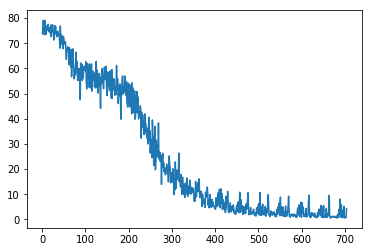

In [102]:
# run training
with tf.Session() as sess: 
    sess.run(init)
    
    losses = []
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Build batches of batch_size            
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
            
            # Run train operator and monitor loss
            _, l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
        
        # For each epoch, run accuracy on train and test
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f"
              % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
    
    # For monitoring purposes
    file_writer = tf.summary.FileWriter('./tensorflow_summaries', sess.graph)    
plt.plot(losses);